### Galilei's Falling Body Experiment

**A note on this document**
This document is known as a Jupyter notebook; it allows text and executable code to coexist in a very easy-to-read format. Blocks can contain text or executable code. For blocks containing code, press `Shift + Enter`, `Ctrl+Enter`, or click the arrow on the block to run the code. Earlier blocks of code need to be run for the later blocks of code to work.

Given the measurements, $y(t_0),y(t_1),\cdots,y(t_n)$, measured at $t_0,t_1,\cdots,t_n$, we want to find (estimate) $\mathbf{x} = [a \quad b \quad c]^\top$  that minimizes $||\mathbf{y} - \hat{\mathbf{y}}||^2$ where $\hat{y} = ax^2+bx+c$.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Instructors only
y0 = 60
v0 = 20
g = -9.8067


data = pd.read_csv("./data/falling_body.csv")
print(data)

    time          y
0   0.00  59.401462
1   0.25  62.952926
2   0.50  76.171217
3   0.75  74.931045
4   1.00  76.726497
5   1.25  74.258851
6   1.50  81.124459
7   1.75  77.286160
8   2.00  80.513922
9   2.25  77.633406
10  2.50  82.059796
11  2.75  80.224779
12  3.00  75.036655
13  3.25  74.792392
14  3.50  65.561716
15  3.75  60.081610
16  4.00  63.303967
17  4.25  57.099935
18  4.50  53.247288
19  4.75  53.900745
20  5.00  41.194168
21  5.25  26.200127
22  5.50  26.141728
23  5.75   7.619361
24  6.00   1.633062


We can convert the Data Frame data into numpy arrays:  

In [5]:
t = data["time"].to_numpy()
y = data["y"].to_numpy()
print(t)
print(y)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25
 3.5  3.75 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.  ]
[59.40146184 62.95292642 76.17121741 74.93104465 76.72649734 74.25885133
 81.12445927 77.28615998 80.51392223 77.63340631 82.05979568 80.22477889
 75.03665498 74.79239248 65.56171647 60.08161025 63.30396681 57.09993461
 53.24728825 53.90074472 41.19416795 26.20012672 26.14172765  7.61936098
  1.63306158]


Plot the data

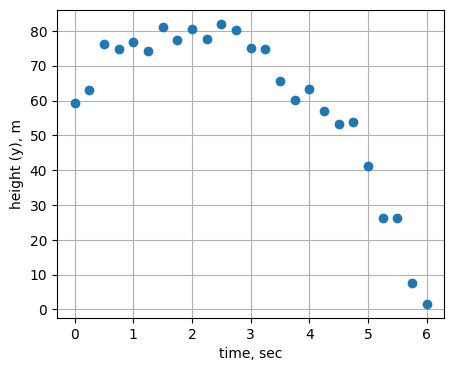

In [6]:
plt.figure(figsize=(5, 4))
plt.plot(t, y, "o")
plt.xlabel("time, sec")
plt.ylabel("height (y), m", rotation=90)
plt.grid(True)

Let's use `np.polyfit` to find the best polynomial function fit.
If our model is $\hat{y} = at + b$, we want to use a first-order polynomial function.

In [7]:
coeffs = np.polyfit(t, y, 1)
print(coeffs)  # the first element is the slope and the second is the y-intercept.

[-9.52506606 88.93908919]


The first element in the `coeffs` array represents the slope denoted as $a$, while the second element corresponds to the $y$-intercept labeled as $b$. Employing the `np.poly1d()` function enables us to generate a polynomial function with the coefficients of our preference. To illustrate:

```python
f = np.poly1d(c)
```

This code snippet generates a function $f = c_0x^n + c_1x^{n-1} + \cdots + c_{n-1}x + c_n$ with coefficients encapsulated within the vector $\mathbf{c}$.

In our specific scenario, using `np.poly1d(coeffs)` furnishes us with $y(t)$. Consequently, by supplying $t$ to the $y(t)$ function through `np.poly1d(coeffs)(t)`, denoted as `y(t) = np.poly1d(coeffs)(t)`, we achieve the desired output.

Text(2, 40, 'M=1')

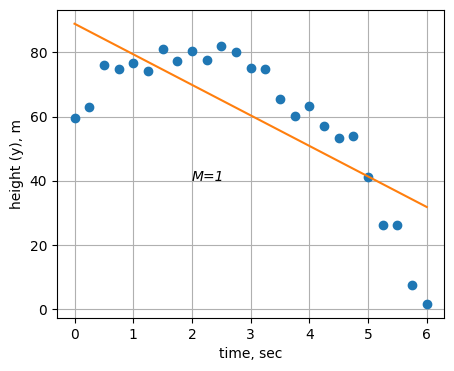

In [8]:
y_hat = np.poly1d(coeffs)(t)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()

plt.plot(t, y, "o")  # plot the measured data
plt.plot(t, y_hat, "-")  # plot the fitted line
plt.xlabel("time, sec")
plt.ylabel("height (y), m", rotation=90)
plt.grid(True)

ax.text(2, 40, "M=1", style="italic")

The line doesn't align well with the measurements. Let's examine the discrepancies (residuals) and the root mean squared error (RMSE). The residual (error) is calculated as $y-\hat{y}$. The RMSE is then computed using the following formula:

$ RMSE = \sqrt{\frac{1}{n}\sum^{n}_{i=0}(y_i-\hat{y}_i)^2}$

In the realm of linear algebra, the norm of a vector is defined as:

$||\mathbf{v}|| = \sqrt{\sum^{n}_{i=0}v^2_i}$

Consequently, we can express the RMSE using the vector norm as:

$ RMSE = \frac{1}{\sqrt{n}}||\mathbf{v}|| $

Here is how we can find the RMSE:

In [9]:
rmse = np.linalg.norm(y - y_hat) / np.sqrt(len(t))
print(rmse)

14.622062324390608


Let's now experiment with a quadratic function for our model, represented as $\hat{y} = at^2 + bt+c$

In [10]:
coeffs = np.polyfit(t, y, 2)
print(coeffs)  # the first element is the slope and the second is the y-intercept.

[-4.87911352 19.74961505 60.88418645]


Text(2, 40, 'M=2')

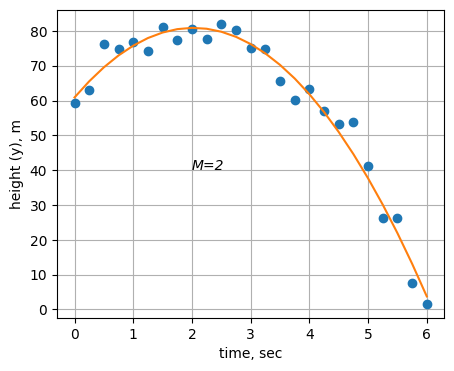

In [11]:
y_hat = np.poly1d(coeffs)(t)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()

plt.plot(t, y, "o")  # plot the measured data
plt.plot(t, y_hat, "-")  # plot the fitted line
plt.xlabel("time, sec")
plt.ylabel("height (y), m", rotation=90)
plt.grid(True)

ax.text(2, 40, "M=2", style="italic")

To find the RMSE

In [12]:
rmse = np.linalg.norm(y - y_hat) / np.sqrt(len(t))
print(rmse)

3.6896122261868185


The quadratic model exhibits a significantly lower RMSE compared to the first-order model.  Let's now try with a forth-order polynomial function.

[ -0.19172868   2.14079152 -12.19914385  27.50884688  59.67319832]


Text(2, 40, 'M=4')

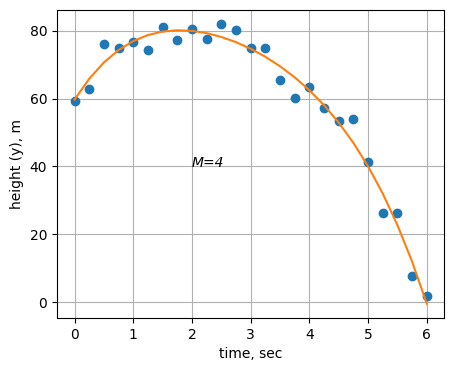

In [13]:
coeffs = np.polyfit(t, y, 4)
print(coeffs)  # the first element is the slope and the second is the y-intercept.

y_hat = np.poly1d(coeffs)(t)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()

plt.plot(t, y, "o")  # plot the measured data
plt.plot(t, y_hat, "-")  # plot the fitted line
plt.xlabel("time, sec")
plt.ylabel("height (y), m", rotation=90)
plt.grid(True)

ax.text(2, 40, "M=4", style="italic")

In [14]:
rmse = np.linalg.norm(y - y_hat) / np.sqrt(len(t))
print(rmse)

3.351382682994531


The fourth-order polynomial function demonstrates a slightly reduced RMSE in comparison to the second-order model. We'll delve deeper into fitting models of higher orders and address concerns related to overfitting.

Moving forward, let's address the problem using the least square estimate method. We need to formulate a system of linear equations as follow

$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}  = \begin{bmatrix} t^2_1 & t_1 & 1 \\ t^2_2 & t_2 & 1 \\ \vdots & \vdots & \vdots \\ t^2_n & t_n & 1 \end{bmatrix} \begin{bmatrix} a \\ b \\c \end{bmatrix}
$

or $\mathbf{y} = C\mathbf{q}$ where

$\mathbf{y} = [y_1 \quad y_2 \quad \cdots \quad y_n]^\top$,  $\mathbf{q} = [a \quad b \quad c]^\top$, and  $C = \begin{bmatrix} t^2_1 & t_1 & 1 \\ t^2_2 & t_2 & 1 \\ \vdots & \vdots & \vdots \\ t^2_n & t_n & 1 \end{bmatrix} $

We can formulate $C$ using `np.stack()`. Make sure $C$ is an $n \times 3$ matrix, i.e., $C\in\mathbb{R}^{n\times 3}$  

In [15]:
C = np.vstack([t**2, t, np.ones_like(t)]).T
print(C.shape)
print(C)

(25, 3)
[[ 0.      0.      1.    ]
 [ 0.0625  0.25    1.    ]
 [ 0.25    0.5     1.    ]
 [ 0.5625  0.75    1.    ]
 [ 1.      1.      1.    ]
 [ 1.5625  1.25    1.    ]
 [ 2.25    1.5     1.    ]
 [ 3.0625  1.75    1.    ]
 [ 4.      2.      1.    ]
 [ 5.0625  2.25    1.    ]
 [ 6.25    2.5     1.    ]
 [ 7.5625  2.75    1.    ]
 [ 9.      3.      1.    ]
 [10.5625  3.25    1.    ]
 [12.25    3.5     1.    ]
 [14.0625  3.75    1.    ]
 [16.      4.      1.    ]
 [18.0625  4.25    1.    ]
 [20.25    4.5     1.    ]
 [22.5625  4.75    1.    ]
 [25.      5.      1.    ]
 [27.5625  5.25    1.    ]
 [30.25    5.5     1.    ]
 [33.0625  5.75    1.    ]
 [36.      6.      1.    ]]


The psedu-inverse of the matrix, $C$ is given by $\tilde{C} = (C^{\top}C)^{-1}C^{\top}$.  In Python, we can use `np.linalg.pinv()` to find it.  The dimension should be 3 by $n$.

In [16]:
pinvC = np.linalg.pinv(C)
print(pinvC.shape)
print(C)

(3, 25)
[[ 0.      0.      1.    ]
 [ 0.0625  0.25    1.    ]
 [ 0.25    0.5     1.    ]
 [ 0.5625  0.75    1.    ]
 [ 1.      1.      1.    ]
 [ 1.5625  1.25    1.    ]
 [ 2.25    1.5     1.    ]
 [ 3.0625  1.75    1.    ]
 [ 4.      2.      1.    ]
 [ 5.0625  2.25    1.    ]
 [ 6.25    2.5     1.    ]
 [ 7.5625  2.75    1.    ]
 [ 9.      3.      1.    ]
 [10.5625  3.25    1.    ]
 [12.25    3.5     1.    ]
 [14.0625  3.75    1.    ]
 [16.      4.      1.    ]
 [18.0625  4.25    1.    ]
 [20.25    4.5     1.    ]
 [22.5625  4.75    1.    ]
 [25.      5.      1.    ]
 [27.5625  5.25    1.    ]
 [30.25    5.5     1.    ]
 [33.0625  5.75    1.    ]
 [36.      6.      1.    ]]


We can now find $\mathbf{q} = [a \quad b \quad c]^\top$:

$\mathbf{q} = \tilde{C}\mathbf{y} = (C^{\top}C)^{-1}C^{\top}\mathbf{y}$

In [17]:
q = pinvC @ y
print(q)

[-4.87911352 19.74961505 60.88418645]


The values in xhat match the coefficients of the quadratic model obtained through the `np.polyfit` function.

Text(2, 40, 'M=2')

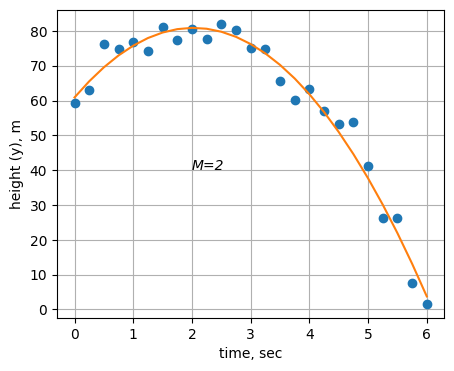

In [18]:
y_hat = np.poly1d(q)(t)

fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot()

plt.plot(t, y, "o")  # plot the measured data
plt.plot(t, y_hat, "-")  # plot the fitted line
plt.xlabel("time, sec")
plt.ylabel("height (y), m", rotation=90)
plt.grid(True)

ax.text(2, 40, "M=2", style="italic")

Another approach is to utilize the `np.linalg.lstsq` function to compute the least square estimate.

In [19]:
q = np.linalg.lstsq(C, y, rcond=None)[0]
print(q)

[-4.87911352 19.74961505 60.88418645]


In [20]:
help(np.linalg.lstsq)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

lstsq(a, b, rcond='warn')
    Return the least-squares solution to a linear matrix equation.
    
    Computes the vector `x` that approximately solves the equation
    ``a @ x = b``. The equation may be under-, well-, or over-determined
    (i.e., the number of linearly independent rows of `a` can be less than,
    equal to, or greater than its number of linearly independent columns).
    If `a` is square and of full rank, then `x` (but for round-off error)
    is the "exact" solution of the equation. Else, `x` minimizes the
    Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
    solutions, the one with the smallest 2-norm :math:`||x||` is returned.
    
    Parameters
    ----------
    a : (M, N) array_like
        "Coefficient" matrix.
    b : {(M,), (M, K)} array_like
        Ordinate or "dependent variable" values. If `b` is two-dimensional,
        the least-squares solution is calculated for each of